**Topic Modeling and Topic Assignment for Healthcare Dataset**


In [ ]:
import pandas as pd
import gensim
from gensim import corpora
from gensim.models import LdaModel
from gensim.utils import simple_preprocess

# Load your healthcare dataset into a DataFrame
# Replace 'your_dataset.csv' with the actual file path or data loading code
df = pd.read_csv('COVID-19 HT(2022).csv')

# Select the relevant columns for text analysis
text_columns = ['Bene_Geo_Desc', 'Bene_Race_Desc', 'Bene_Age_Desc', 'Bene_RUCA_Desc']

# Concatenate the selected columns into a single text column
df['text'] = df[text_columns].apply(lambda x: ' '.join(x), axis=1)

# Extract the 'text' column as a list of documents
documents = df['text'].tolist()

# Preprocess the text data (tokenization, removing stopwords, etc.)
documents = [simple_preprocess(doc) for doc in documents]

# Create a dictionary and a document-term matrix
dictionary = corpora.Dictionary(documents)
corpus = [dictionary.doc2bow(doc) for doc in documents]

# Build the LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, passes=15)

# Print the topics and associated words
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)

# Assign topics to documents
df['topic'] = [max(lda_model[doc], key=lambda x: x[1])[0] for doc in corpus]

(0, '0.442*"all" + 0.121*"asian" + 0.121*"pacific" + 0.121*"islander" + 0.054*"utah" + 0.054*"texas" + 0.051*"maryland" + 0.003*"virginia" + 0.002*"wisconsin" + 0.002*"pennsylvania"')
(1, '0.442*"all" + 0.133*"hispanic" + 0.066*"white" + 0.066*"non" + 0.059*"dakota" + 0.030*"south" + 0.029*"north" + 0.028*"columbia" + 0.028*"of" + 0.028*"district"')
(2, '0.565*"all" + 0.227*"urban" + 0.106*"oklahoma" + 0.101*"delaware" + 0.000*"nebraska" + 0.000*"pennsylvania" + 0.000*"tennessee" + 0.000*"washington" + 0.000*"mississippi" + 0.000*"vermont"')
(3, '0.426*"unknown" + 0.411*"all" + 0.074*"other" + 0.031*"hawaii" + 0.009*"washington" + 0.009*"vermont" + 0.008*"tennessee" + 0.008*"nebraska" + 0.008*"idaho" + 0.008*"mississippi"')
(4, '0.631*"all" + 0.031*"new" + 0.022*"virginia" + 0.011*"west" + 0.011*"rhode" + 0.011*"island" + 0.011*"ohio" + 0.011*"wyoming" + 0.011*"york" + 0.011*"jersey"')
(5, '0.300*"all" + 0.206*"alaska" + 0.146*"american" + 0.145*"native" + 0.145*"indian" + 0.003*"virgi

Assigning and Mapping Topic Labels to Healthcare Dataset

In [ ]:
# Manually assign labels to the topics based on interpretation
topic_labels = [
    "Topic 1: Patient Demographics",
    "Topic 2: Hospitalization Statistics",
    "Topic 3: Medicare Enrollment Status",
    "Topic 4: Geographic Description",
    "Topic 5: Healthcare Discharge"
    # Add more labels as needed based on your interpretation
]

# Create a dictionary to map topic IDs to labels
topic_labels_dict = {i: label for i, label in enumerate(topic_labels)}

# Check the unique values in the 'topic' column to ensure they match the topic IDs
unique_topics = df['topic'].unique()
print("Unique Topics:", unique_topics)

# Check for NaN values in the 'topic' column
nan_topics = df[df['topic'].isna()]
print("NaN Topics:", nan_topics)

# Map topic labels to the 'topic' column and handle NaN values with a default label
df['topic_label'] = df['topic'].map(topic_labels_dict).fillna("Undefined Topic")

# Display the first few rows of the DataFrame with topic labels
print(df[['topic', 'topic_label']].head())

Unique Topics: [8 2 7 5 0 9 1 3 6 4]
NaN Topics: Empty DataFrame
Columns: [Year, Month, Bene_Geo_Desc, Bene_Mdcd_Mdcr_Enrl_Stus, Bene_Race_Desc, Bene_Sex_Desc, Bene_Mdcr_Entlmt_Stus, Bene_Age_Desc, Bene_RUCA_Desc, Total_Hosp, Total_Enrl, Total_Hosp_Per100K, Avg_LOS, Pct_Dschrg_SNF, Pct_Dschrg_Expired, Pct_Dschrg_Home, Pct_Dschrg_Hspc, Pct_Dschrg_HomeHealth, Pct_Dschrg_Other, text, topic]
Index: []

[0 rows x 21 columns]
   topic                          topic_label
0      8                      Undefined Topic
1      8                      Undefined Topic
2      2  Topic 3: Medicare Enrollment Status
3      8                      Undefined Topic
4      8                      Undefined Topic


Calculate and Display Topic Distribution

In [ ]:
# Calculate the number of documents per topic
topic_counts = df['topic_label'].value_counts().reset_index()
topic_counts.columns = ['topic_label', 'document_count']

# Calculate the percentage of documents per topic
total_documents = len(df)
topic_counts['percentage'] = (topic_counts['document_count'] / total_documents) * 100

# Display the topic distribution
print(topic_counts)

                           topic_label  document_count  percentage
0        Topic 5: Healthcare Discharge           22531   41.523378
1                      Undefined Topic           14491   26.706106
2  Topic 2: Hospitalization Statistics            7198   13.265513
3        Topic 1: Patient Demographics            4658    8.584434
4      Topic 4: Geographic Description            3346    6.166492
5  Topic 3: Medicare Enrollment Status            2037    3.754078


Create Bar Chart for Topic Distribution

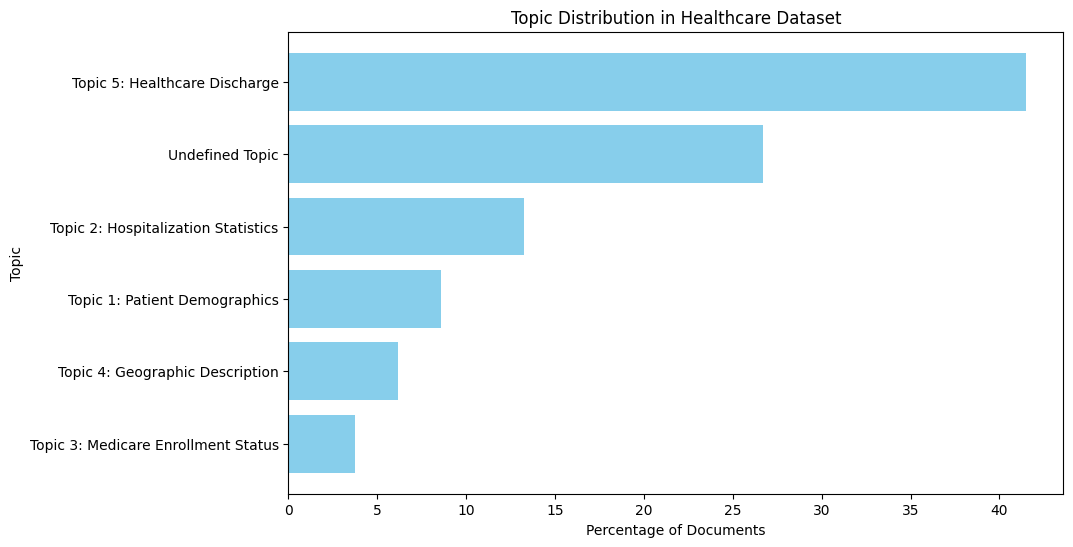

In [ ]:
import matplotlib.pyplot as plt

# Create a bar chart of topic distribution
plt.figure(figsize=(10, 6))
plt.barh(topic_counts['topic_label'], topic_counts['percentage'], color='skyblue')
plt.xlabel('Percentage of Documents')
plt.ylabel('Topic')
plt.title('Topic Distribution in Healthcare Dataset')
plt.gca().invert_yaxis()  # Invert the y-axis for better readability
plt.show()